<a href="https://colab.research.google.com/github/NihalGadkari99/Stock-Market-Prediction-Using-Machine-Learning/blob/main/Stock_Market_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK MARKET PREDICTION USING MACHINE LEARNING**



**We Will Be Using A Keras Long Short-Term Memory (LSTM) Model To Predict The Stock Price Of Tata Global Beverages.**

**Here Are Some Imports We Need To Make: Numpy For Scientific Computation, Matplotlib For Graphing, And Pandas For Manipulating Data.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

**Load Training Data Set With The "Open" And "High" Columns To Use In Our Modeling.**

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

**Let's Take A Look At The First Five Rows Of Our Dataset.**

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Import MinMaxScaler From Scikit-Learn To Scale Our Dataset Into Numbers Between 0 And 1.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

**We Want Our Data To Be In The Form Of A 3D Array For Our LSTM Model. First, We Create Data In 60 Timesteps And Convert It Into An Array Using NumPy. Then, We Convert The Data Into A 3D Array With X_train Samples, 60 Timestamps, And One Feature At Each Step.**

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Make The Necessary Imports From Keras.**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

**Add LSTM Layer Along With Dropout Layers To Prevent Overfitting. After That, We Add A Dense Layer That Specifies A One Unit Output. Next, We Compile The Model Using The Adam Optimizer And Set The Loss As The Mean_Squarred_Error.**

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 12s 86ms/step - loss: 0.0119
Epoch 2/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 9s 153ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 5s 88ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 6s 91ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 5s 88ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 6s 90ms/step - loss: 0.0024
Epoch 9/100
62/62 [==============================] - 5s 87ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 5s 84ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 5s 87ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 5s 86ms/step - loss: 0.0017
Epoch 13/100
62/62 [=

**Import the test set for the model to make predictions on**

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

**Before Predicting Future Stock Prices, We Have To Manipulate The Training Set; We Merge The Training Set And The Test Set On The 0 Axis, Set The Time Step To 60, Use Minmaxscaler, And Reshape The Dataset As Done Previously. After Making Predictions, We Use Inverse_Transform To Get Back The Stock Prices In Normal Readable Format.**

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


**Plot Our Predicted Stock Prices And The Actual Stock Price.**

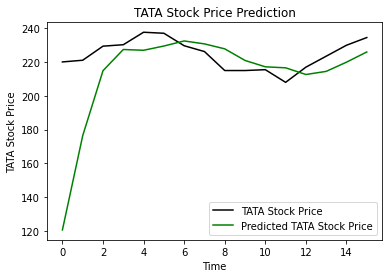

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()